# Building a Convolutional Neural Network for Fashion Image Classification (MNIST Fashion)
#### This Jupyter Notebook explores building a Convolutional Neural Network (CNN) to classify fashion items from the MNIST Fashion dataset. 

First, we import libraries necessary to work with the MNIST Fashion dataset and build a Convolutional Neural Network (CNN) for image classification. Here's a breakdown of the imports:

1. TensorFlow is a popular open-source framework for numerical computation, machine learning, and deep learning.
2. NumPy provides powerful array manipulation capabilities and mathematical functions commonly used in data science and machine learning.
3. Keras is a high-level API built on top of TensorFlow, offering a user-friendly interface for building and training neural networks.
4. The MNIST Fashion dataset from TensorFlow's built-in datasets consists of grayscale images of various clothing items labeled with their corresponding categories (e.g., T-shirt, trouser, etc.).

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

Next, we load the MNIST Fashion data into training and testing sets (images and labels) and then prints their sizes to understand how much data we're working with.

In [17]:
# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the shapes of training and testing data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Next, we preprocess the data by normalizing the pixel values (containing the values between 0 and 1). Then, we take a look at the first few images in the training data to see what we are working with.

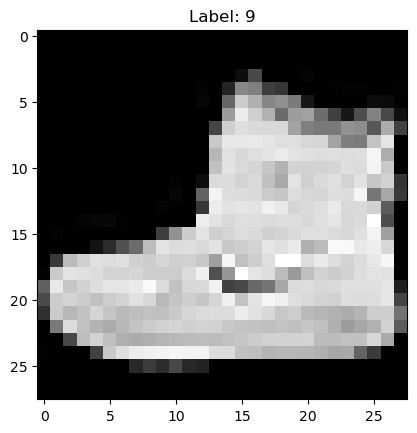

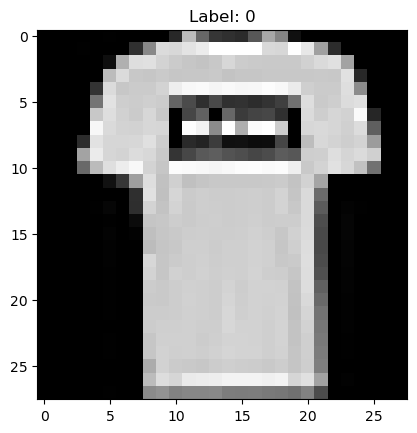

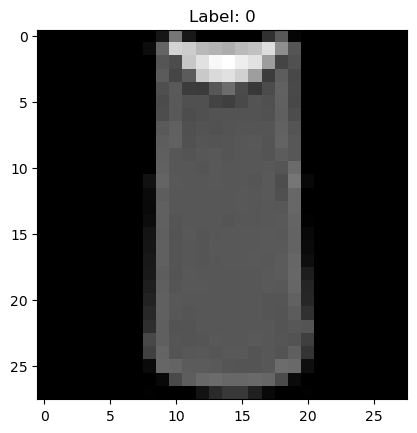

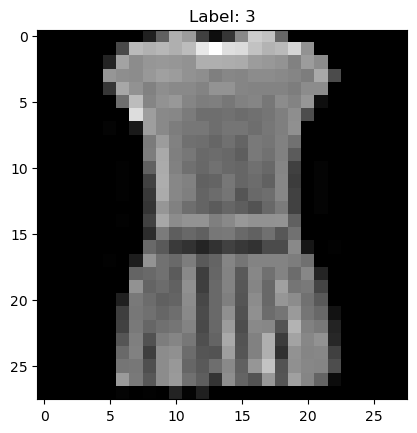

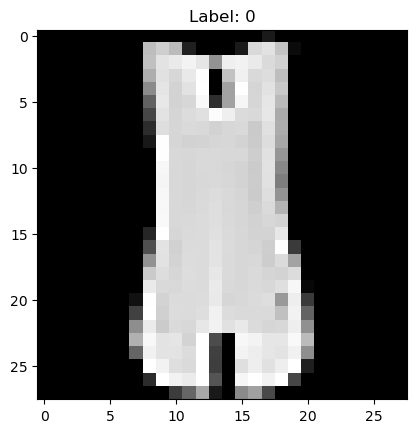

In [18]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0  # Normalize pixel values
test_images = test_images.astype('float32') / 255.0

# Optionally visualize some sample images using Matplotlib
import matplotlib.pyplot as plt

# Define a function to visualize an image
def plot_image(image, label):
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.title("Label: " + str(label))
  plt.show()

# Example: Plot first 5 images from training data
for i in range(5):
  plot_image(train_images[i], train_labels[i])

# Convolutional Neural Network (CNN) for Image Classification
We define a Convolutional Neural Network (CNN) model specifically designed to handle image classification tasks. Here's a breakdown of the model architecture and the reasoning behind each layer choice for the MNIST Fashion dataset:

## What is a CNN?

A CNN is a type of artificial neural network specifically designed to work with image data. Unlike traditional neural networks that treat images as one-dimensional arrays, CNNs exploit the spatial relationships between pixels in an image. They achieve this through convolutional layers and pooling layers.

## Layers in the CNN Model:

The model in this cell uses several key layers:

### Conv2D (Convolutional Layer):

This layer is the core building block of a CNN. It applies filters to the input image, extracting features like edges, shapes, and textures.
In this model, there are two Conv2D layers:
#### First Conv2D:
32 in Conv2D(32, (3, 3), activation='relu'): This defines the number of filters (32) used to learn different features.
Kernel size of (3, 3): This indicates the size of the filter that slides across the image.
Activation function: 'relu' (Rectified Linear Unit) is a commonly used activation function that introduces non-linearity to the network.
#### Second Conv2D: Similar to the first one, but with 64 filters (potentially learning more complex features).

### MaxPooling2D (Pooling Layer):

This layer downsamples the feature maps generated by the convolutional layers. It reduces the dimensionality of the data while preserving important features.
In this model, there are two MaxPooling2D layers, each with a pool size of (2, 2). This reduces the width and height of the feature maps by half.

### Flatten:

This layer transforms the 2D feature maps from the convolutional layers into a 1D vector suitable for feeding into dense layers (fully-connected layers).

### Dense (Fully-Connected Layer):

This layer is similar to a traditional neural network layer where all neurons are connected to all neurons in the previous layer. It performs a linear combination of the input features and applies an activation function.
In this model, there are two Dense layers:
#### First Dense:
128 in Dense(128, activation='relu') defines the number of neurons in this layer (128). This layer learns higher-level features from the flattened data.
#### Second Dense (Output Layer):
Dense(10, activation='softmax'): This final layer has 10 neurons, one for each clothing category in the MNIST Fashion dataset (T-shirt, trouser, etc.). The 'softmax' activation ensures the output probabilities for all categories sum to 1.

In [19]:
# Define the CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
  MaxPooling2D((2, 2)),  # Pooling layer
  Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
  MaxPooling2D((2, 2)),  # Pooling layer
  Flatten(),  # Flatten the data for dense layers
  Dense(128, activation='relu'),  # First dense layer
  Dense(10, activation='softmax')  # Output layer with 10 units for 10 clothing categories
])

# Print a summary of the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

#### We then compile and train the model:
1. Optimizer: 'adam' (Adaptive Moment Estimation). The optimizer is an algorithm that iteratively updates the weights of the neural network based on the calculated loss during training.
2. Loss Function: 'sparse_categorical_crossentropy'. This defines the loss function used to measure how well the model's predictions match the true labels. In this case, 'sparse_categorical_crossentropy' is suitable for multi-class classification problems like MNIST Fashion, where each image belongs to one of 10 clothing categories. This loss function calculates the average cross-entropy between the predicted probabilities and the one-hot encoded labels.
2. Metrics:['accuracy']. This defines the metrics used to monitor the model's performance during training. 'accuracy' calculates the percentage of images the model correctly classifies.

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), batch_size=64)

Epoch 1/5
938/938 [==============================] - 11s 11ms/step - loss: 0.1989 - accuracy: 0.9254 - val_loss: 0.2585 - val_accuracy: 0.9065
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1773 - accuracy: 0.9343 - val_loss: 0.2538 - val_accuracy: 0.9081
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1594 - accuracy: 0.9413 - val_loss: 0.2683 - val_accuracy: 0.9100
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1441 - accuracy: 0.9459 - val_loss: 0.2567 - val_accuracy: 0.9123
Epoch 5/5
938/938 [==============================] - 10s 10ms/step - loss: 0.1271 - accuracy: 0.9522 - val_loss: 0.2663 - val_accuracy: 0.9116


#### The last step is to evaluate the performance of the trained CNN model on the test data

**Test Evaluation:**

1. **`test_loss, test_acc = model.evaluate(test_images, test_labels)`:**
   * This line evaluates the model on the test data (`test_images` and `test_labels`). It calculates the loss (how wrong the model is on average) and accuracy (percentage of correct predictions).

**Custom Classification Report:**

2. **Predictions:**
   * **`predictions = model.predict(test_images)`:**
      * This line makes predictions on the test data using the trained model.
   * **`predictions = np.argmax(predictions, axis=1)`:**
      * This line extracts the predicted class labels from the model's output (which might be probabilities for each class).
      * `np.argmax` finds the index of the maximum value along the specified axis (axis=1 in this case, meaning for each row). This gives us the most likely predicted class for each image.

**Confusion Matrix:**

3. **Creating the Matrix:**
   * **`num_classes = 10`:** Assuming there are 10 clothing categories in MNIST Fashion.
   * **`confusion_matrix = np.zeros((num_classes, num_classes))`:** This line creates a NumPy zero matrix of size (10, 10) to store the confusion matrix.
   * The confusion matrix tracks how many times the model predicted each class for each actual class. For example, if an image of a T-shirt (class 0) was predicted as a Trouser (class 1), the value at `confusion_matrix[0, 1]` would be incremented by 1.

**Simplified Classification Report:**
* The report is formatted to display class names, accuracy percentages (rounded to two decimal places), and the number of examples in each class.

In [29]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Implement custom classification report and confusion matrix

# Get predictions on test data
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)  # Get predicted class labels

# Create a confusion matrix
num_classes = 10  # Assuming 10 clothing categories in MNIST Fashion
confusion_matrix = np.zeros((num_classes, num_classes))

for i in range(len(test_labels)):
  true_label = test_labels[i]
  predicted_label = predictions[i]
  confusion_matrix[true_label, predicted_label] += 1

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

# Implement a simplified classification report (without sklearn)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # Replace ... with remaining class names (0-9)
class_wise_accuracy = np.zeros(num_classes)
class_wise_count = np.zeros(num_classes)

for i in range(len(test_labels)):
  true_label = test_labels[i]
  predicted_label = predictions[i]
  class_wise_count[true_label] += 1
  if true_label == predicted_label:
    class_wise_accuracy[true_label] += 1

print("Classification Report:")
print("{:15s} {:15s} {:15s}".format('Class', 'Accuracy', 'Count'))
for i in range(num_classes):
  accuracy = class_wise_accuracy[i] / (class_wise_count[i] + 1e-10)  # Avoid division by zero
  print("{:15s} {:15.2f}% {:15f}".format(class_names[i], accuracy * 100, class_wise_count[i]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9116
Test accuracy: 0.9115999937057495
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[884.   0.  10.  13.   4.   1.  82.   0.   6.   0.]
 [  6. 979.   1.   9.   1.   0.   3.   0.   1.   0.]
 [ 20.   0. 823.   8.  70.   0.  78.   0.   1.   0.]
 [ 24.   2.   9. 920.  13.   0.  31.   0.   1.   0.]
 [  0.   0.  27.  29. 874.   0.  69.   0.   1.   0.]
 [  0.   0.   0.   0.   0. 992.   0.   4.   0.   4.]
 [114.   0.  39.  19.  61.   0. 760.   0.   7.   0.]
 [  0.   0.   0.   0.   0.  34.   0. 945.   0.  21.]
 [  4.   0.   2.   5.   4.   2.   6.   2. 975.   0.]
 [  1.   0.   0.   0.   0.   7.   0.  28.   0. 964.]]
Classification Report:
Class           Accuracy        Count          
T-shirt/top               88.40%     1000.000000
Trouser                   97.90%     1000.000000
Pullover                  82.30%     1000.000000
Dress                     92.00%     1000.000000
Coat  